In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from interpret.blackbox import LimeTabular


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

In [ ]:
pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.9 MB 5.0 MB/s 
     |████████████████████████████████| 569 kB 35.9 MB/s 
     |████████████████████████████████| 3.6 MB 14.7 MB/s 
     |████████████████████████████████| 6.0 MB 36.2 MB/s 
     |████████████████████████████████| 9.9 MB 30.2 MB/s 
     |████████████████████████████████| 275 kB 39.6 MB/s 
     |████████████████████████████████| 280 kB 33.6 MB/s 
     |████████████████████████████████| 756 kB 11.1 MB/s 
     |████████████████████████████████| 254 kB 46.3 MB/s 
     |████████████████████████████████| 1.6 MB 43.4 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 115 kB 45.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283858 sha256=42b254ae69aaf892367854fffdca18e6a32e26eb4e196f8f717e9a620f8b4678
  S

In [ ]:
df = read_csv("/content/heart.csv")

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


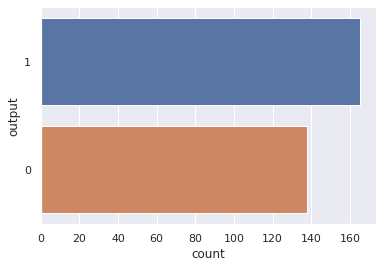

In [ ]:
sns.countplot(y=df["output"], data=df, order = df["output"].value_counts().index)
plt.show()

In [ ]:
target_y=df["output"]
features_x=df.drop("output", axis=1)

In [ ]:
features_array =features_x.values
y=target_y.values

In [ ]:
from interpret.glassbox import (LogisticRegression, ClassificationTree,ExplainableBoostingClassifier)
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features_x,y,test_size=0.25,random_state=42)

In [ ]:
minmax = MinMaxScaler(feature_range=(0,1))
x_train_minmax= minmax.fit_transform(x_train)
x_test_minmax= minmax.transform(x_test)


Data_normalizer = Normalizer(norm='l1')
x_train_l1= Data_normalizer.fit_transform(x_train)
x_test_l1= Data_normalizer.transform(x_test)


Data_normalizer2 = Normalizer(norm='l2')
x_train_l2= Data_normalizer2.fit_transform(x_train)
x_test_l2= Data_normalizer2.transform(x_test)

data_scaler = StandardScaler()
x_train_scaler= Data_normalizer.fit_transform(x_train)
x_test_scaler= Data_normalizer.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

The accuracy is:  0.7894736842105263
The precision is:  0.8048780487804879
The recall is:  0.8048780487804879
The f1_score is:  0.8048780487804877
The report is:                precision    recall  f1-score   support

           0       0.77      0.77      0.77        35
           1       0.80      0.80      0.80        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76

The confusion_matrix is:  [[27  8]
 [ 8 33]]
The roc is:  0.7881533101045296
The loss is:  7.271405514447534


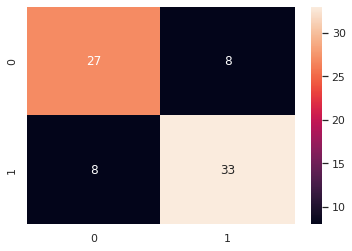

In [ ]:
lr=DecisionTreeClassifier()
lr.fit(x_train,y_train)
y_predictions=lr.predict(x_test)


accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)


roc=roc_auc_score(y_test, y_predictions,  average = 'macro')
loss=log_loss(y_test, y_predictions)



print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The report is: ",report)
print("The confusion_matrix is: ",confusion)

print("The roc is: ",roc)
print("The loss is: ",loss)

sns.heatmap(confusion,annot=True,fmt="g")

The accuracy is:  0.8026315789473685
The precision is:  0.8421052631578947
The recall is:  0.7804878048780488
The f1_score is:  0.810126582278481
The report is:                precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.84      0.78      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76

The confusion_matrix is:  [[29  6]
 [ 9 32]]
The roc is:  0.8045296167247387
The loss is:  6.816926888266335


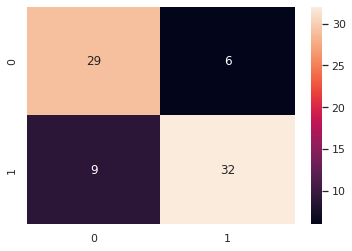

In [ ]:
lr=AdaBoostClassifier()
lr.fit(x_train_minmax,y_train)
y_predictions=lr.predict(x_test_minmax)


accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)


roc=roc_auc_score(y_test, y_predictions,  average = 'macro')
loss=log_loss(y_test, y_predictions)



print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The report is: ",report)
print("The confusion_matrix is: ",confusion)

print("The roc is: ",roc)
print("The loss is: ",loss)

sns.heatmap(confusion,annot=True,fmt="g")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features_x,target_y,test_size=0.30,random_state=42)

In [ ]:
lr=GaussianNB()
lr.fit(x_train,y_train)

GaussianNB()

In [ ]:
from interpret import show

In [ ]:
lr_global = lr.explain_global(name="Logistic Regression")
show(lr_global)

AttributeError: ignored

In [ ]:
lr_local = lr.explain_local(x_train[:100],y_train[:100],name="Logistic Regression")
show(lr_local)

AttributeError: ignored

In [ ]:
lime = LimeTabular(predict_fn = lr.predict_proba, data = x_train, random_state = 1)
lime_local=lime.explain_local(x_train[:-20], y_train[:-20], name = "Lime")
show(lime_local)

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(lr)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(x_test[start_index:end_index])
#print(shap_values[0].shape)
x_test[start_index:end_index]

InvalidModelError: ignored

In [ ]:
shap.initjs()
prediction = lr.predict(x_test[start_index:end_index])[0]

print(f"The RF predicted : {prediction}")

shap.force_plot(explainer.expected_value[1], shap_values[1], x_test[start_index:end_index ])

NameError: ignored

In [ ]:
shap.summary_plot(shap_values, x_test)

Counterfactuals

In [ ]:
pip install dice_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 6.7 MB/s 


In [ ]:
df_feat = x_train.columns
df_feat

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [ ]:
import dice_ml

In [ ]:
continuous_feat =["trtbps", "chol", "fbs" ]

In [ ]:
data_dice =dice_ml.Data(dataframe = df, continuous_features =  continuous_feat, outcome_name="output")

In [ ]:
rf_dice = dice_ml.Model(model=lr, backend = "sklearn")

In [ ]:
explainer = dice_ml.Dice(data_dice, rf_dice, method = "random")

In [ ]:
input_datapoint =x_test[0:3]
cf = explainer.generate_counterfactuals(input_datapoint, total_CFs=3, desired_class = "opposite")

100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


In [ ]:
cf.visualize_as_dataframe(show_only_changes = True)

Query instance (original outcome : 0)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0



Diverse Counterfactual set (new outcome: 1.0)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,34.0,1.0,0.0,-,562.0,-,0.0,112.0,1.0,0.6,1.0,1.0,1.0,1.0
1,57.0,1.0,0.0,-,-,-,0.0,163.0,0.0,0.6,1.0,1.0,1.0,1.0
2,57.0,1.0,0.0,-,554.0,-,0.0,112.0,0.0,0.6,1.0,1.0,1.0,1.0


Query instance (original outcome : 1)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,3,170,288,0,0,159,0,0.2,1,0,3,1



Diverse Counterfactual set (new outcome: 0.0)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59.0,0.0,3.0,-,-,-,0.0,159.0,0.0,0.2,1.0,4.0,3.0,0.0
1,59.0,1.0,3.0,-,-,1.0,0.0,159.0,0.0,0.2,1.0,4.0,3.0,0.0
2,59.0,1.0,3.0,-,-,-,0.0,120.0,0.0,0.2,1.0,1.0,3.0,0.0


Query instance (original outcome : 1)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1



Diverse Counterfactual set (new outcome: 0.0)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57.0,1.0,2.0,-,214.0,-,1.0,173.0,1.0,0.2,2.0,1.0,3.0,0.0
1,57.0,1.0,2.0,-,-,-,1.0,95.0,0.0,0.8,2.0,1.0,3.0,0.0
2,57.0,1.0,2.0,-,-,-,1.0,173.0,0.0,3.8,2.0,1.0,3.0,0.0
